## Logistic Regression From Scratch

Now let's explore **Logistic Regression**, which is used for **classification** problems instead of regression. While linear regression predicts continuous values, logistic regression predicts probabilities for binary classification.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
class LogisticRegressionFromScratch:
    """
    Logistic regression for binary classification using gradient descent.
    Uses sigmoid function to output probabilities between 0 and 1.
    """
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
    
    def _sigmoid(self, z):
        # Clip z to prevent overflow in exp(-z)
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.max_iterations):
            # Forward pass: compute predictions
            z = X @ self.weights + self.bias
            y_pred = self._sigmoid(z)
            
            # Compute cost using cross-entropy loss
            cost = self._compute_cost(y, y_pred)
            self.cost_history.append(cost)
            
            # Compute gradients
            dw = (1 / n_samples) * X.T @ (y_pred - y)
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def _compute_cost(self, y_true, y_pred):
        """
        Cross-entropy loss (also known as logistic loss or negative log-likelihood)
        
        For binary classification:
        - Cross-entropy: CE = -[y*log(p) + (1-y)*log(1-p)]
        - Negative log-likelihood: NLL = -log(L) where L = p^y * (1-p)^(1-y)
        - These are mathematically identical!
        
        The formula measures how far our predicted probabilities are from the true labels.
        """
        # Add small epsilon to prevent log(0)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        cost = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return cost
    
    def predict_proba(self, X):
        """Return probabilities"""
        z = X @ self.weights + self.bias
        return self._sigmoid(z)
    
    def predict(self, X):
        """Return binary predictions (0 or 1)"""
        return (self.predict_proba(X) >= 0.5).astype(int)

## Cross-Entropy vs Negative Log-Likelihood: Understanding the Connection

### **Are They Really Different?**

Great question! In the context of logistic regression, **Cross-Entropy Loss** and **Negative Log-Likelihood** are actually **the same thing**! Let's understand why:

### **Mathematical Derivation**

**1. Log-Likelihood for Binary Classification:**
For a single sample with true label y and predicted probability p:
- If y = 1: likelihood = p
- If y = 0: likelihood = (1 - p)

This can be written compactly as: **L = p^y × (1-p)^(1-y)**

**2. Log-Likelihood:**
Taking the natural logarithm: **log L = y × log(p) + (1-y) × log(1-p)**

**3. Negative Log-Likelihood:**
To convert maximization to minimization: **-log L = -(y × log(p) + (1-y) × log(1-p))**

**4. Cross-Entropy Loss:**
For binary classification: **CE = -(y × log(p) + (1-y) × log(1-p))**

### **Key Insights:**

1. **They are identical**: Cross-entropy loss IS negative log-likelihood for logistic regression
2. **Different perspectives**: 
   - **Information Theory**: Cross-entropy measures information content between distributions
   - **Statistical**: Negative log-likelihood measures how well our model fits the data
3. **Same optimization**: Both lead to identical gradient descent updates
4. **Probabilistic interpretation**: Both assume our predictions are probabilities from a Bernoulli distribution

### **Why Use Cross-Entropy Terminology?**

- **Historical**: Comes from information theory (Claude Shannon)
- **Generalization**: Extends naturally to multi-class classification
- **Intuitive**: Measures "distance" between predicted and true probability distributions
- **Standard**: Widely adopted in machine learning literature

### **Practical Implementation:**

Both formulations give the same result. The choice of name is more about context and convention than mathematical difference.

In [8]:
# Demonstrating Cross-Entropy = Negative Log-Likelihood
import numpy as np

def cross_entropy_loss(y_true, y_pred):
    """Cross-entropy loss formulation"""
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def negative_log_likelihood(y_true, y_pred):
    """Negative log-likelihood formulation"""
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    
    # For each sample: if y=1, likelihood=p; if y=0, likelihood=(1-p)
    # Combined: likelihood = p^y * (1-p)^(1-y)
    # Log-likelihood = y*log(p) + (1-y)*log(1-p)
    # Negative log-likelihood = -(y*log(p) + (1-y)*log(1-p))
    
    log_likelihood = y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)
    return -np.mean(log_likelihood)

# Test with sample data
y_true_sample = np.array([1, 0, 1, 0, 1])
y_pred_sample = np.array([0.9, 0.1, 0.8, 0.2, 0.7])

ce_loss = cross_entropy_loss(y_true_sample, y_pred_sample)
nll_loss = negative_log_likelihood(y_true_sample, y_pred_sample)

print("MATHEMATICAL EQUIVALENCE DEMONSTRATION:")
print(f"Cross-Entropy Loss:      {ce_loss:.6f}")
print(f"Negative Log-Likelihood: {nll_loss:.6f}")
print(f"Difference:              {abs(ce_loss - nll_loss):.10f}")
print(f"Are they equal? {np.isclose(ce_loss, nll_loss)}")

print("\nSTEP-BY-STEP CALCULATION:")
for i in range(len(y_true_sample)):
    y, p = y_true_sample[i], y_pred_sample[i]
    
    # Cross-entropy for this sample
    ce_sample = -(y * np.log(p) + (1-y) * np.log(1-p))
    
    # Negative log-likelihood for this sample
    if y == 1:
        likelihood = p
    else:
        likelihood = 1 - p
    nll_sample = -np.log(likelihood)
    
    print(f"Sample {i+1}: y={y}, p={p:.1f}")
    print(f"  Cross-entropy: -{y}*log({p:.1f}) - {1-y}*log({1-p:.1f}) = {ce_sample:.4f}")
    print(f"  Neg log-lik:   -log({likelihood:.1f}) = {nll_sample:.4f}")
    print(f"  Equal? {np.isclose(ce_sample, nll_sample)}")
    print()

MATHEMATICAL EQUIVALENCE DEMONSTRATION:
Cross-Entropy Loss:      0.202737
Negative Log-Likelihood: 0.202737
Difference:              0.0000000000
Are they equal? True

STEP-BY-STEP CALCULATION:
Sample 1: y=1, p=0.9
  Cross-entropy: -1*log(0.9) - 0*log(0.1) = 0.1054
  Neg log-lik:   -log(0.9) = 0.1054
  Equal? True

Sample 2: y=0, p=0.1
  Cross-entropy: -0*log(0.1) - 1*log(0.9) = 0.1054
  Neg log-lik:   -log(0.9) = 0.1054
  Equal? True

Sample 3: y=1, p=0.8
  Cross-entropy: -1*log(0.8) - 0*log(0.2) = 0.2231
  Neg log-lik:   -log(0.8) = 0.2231
  Equal? True

Sample 4: y=0, p=0.2
  Cross-entropy: -0*log(0.2) - 1*log(0.8) = 0.2231
  Neg log-lik:   -log(0.8) = 0.2231
  Equal? True

Sample 5: y=1, p=0.7
  Cross-entropy: -1*log(0.7) - 0*log(0.3) = 0.3567
  Neg log-lik:   -log(0.7) = 0.3567
  Equal? True



### **When Does the Terminology Matter?**

**1. Multi-class Classification:**
- **Cross-entropy**: Naturally extends to multiple classes
- **Negative log-likelihood**: Still applies but less commonly used terminology

**2. Different Probability Distributions:**
- **Cross-entropy**: General concept for any two probability distributions
- **Negative log-likelihood**: Specific to the assumed data distribution (e.g., Bernoulli, Multinomial)

**3. Information Theory vs Statistics:**
- **Cross-entropy**: Measures bits of information needed to encode one distribution using another
- **Negative log-likelihood**: Measures how well our model explains observed data

### **Practical Takeaway:**

For binary logistic regression:
- **Use either term** - they're mathematically identical
- **Cross-entropy** is more common in modern ML literature
- **Negative log-likelihood** emphasizes the probabilistic foundation
- **Both lead to the same gradients** and optimization

The key insight is that logistic regression assumes your data comes from a Bernoulli distribution, and maximizing the likelihood of this distribution is equivalent to minimizing the cross-entropy between predicted and true probability distributions.

Logistic Regression Accuracy: 0.950
Learned weights: [0.65019483 3.59544398]
Learned bias: -0.348


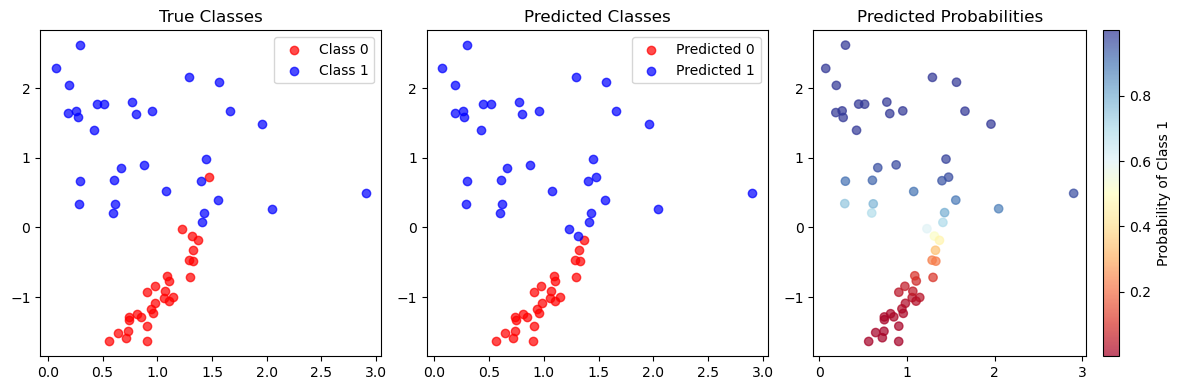

In [7]:
# Generate binary classification data
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report

# Create a simple binary classification dataset
X_class, y_class = make_classification(n_samples=300, n_features=2, n_redundant=0, 
                                      n_informative=2, n_clusters_per_class=1, 
                                      random_state=42)

# Split the data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42)

# Train logistic regression model
logistic_model = LogisticRegressionFromScratch(learning_rate=0.1, max_iterations=1000)
logistic_model.fit(X_train_class, y_train_class)

# Make predictions
y_pred_class = logistic_model.predict(X_test_class)
y_proba_class = logistic_model.predict_proba(X_test_class)

# Evaluate the model
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Logistic Regression Accuracy: {accuracy:.3f}")
print(f"Learned weights: {logistic_model.weights}")
print(f"Learned bias: {logistic_model.bias:.3f}")

# Visualize the results
plt.figure(figsize=(12, 4))

# Plot 1: Original data
plt.subplot(1, 3, 1)
plt.scatter(X_test_class[y_test_class==0, 0], X_test_class[y_test_class==0, 1], 
           c='red', alpha=0.7, label='Class 0')
plt.scatter(X_test_class[y_test_class==1, 0], X_test_class[y_test_class==1, 1], 
           c='blue', alpha=0.7, label='Class 1')
plt.title('True Classes')
plt.legend()

# Plot 2: Predictions
plt.subplot(1, 3, 2)
plt.scatter(X_test_class[y_pred_class==0, 0], X_test_class[y_pred_class==0, 1], 
           c='red', alpha=0.7, label='Predicted 0')
plt.scatter(X_test_class[y_pred_class==1, 0], X_test_class[y_pred_class==1, 1], 
           c='blue', alpha=0.7, label='Predicted 1')
plt.title('Predicted Classes')
plt.legend()

# Plot 3: Probabilities
plt.subplot(1, 3, 3)
scatter = plt.scatter(X_test_class[:, 0], X_test_class[:, 1], 
                     c=y_proba_class, cmap='RdYlBu', alpha=0.7)
plt.colorbar(scatter, label='Probability of Class 1')
plt.title('Predicted Probabilities')

plt.tight_layout()
plt.show()